Playing Original Audio...
Playing Noisy Audio with White Noise...
Noisy audio saved to C:\Users\rohit\Music\new.wav


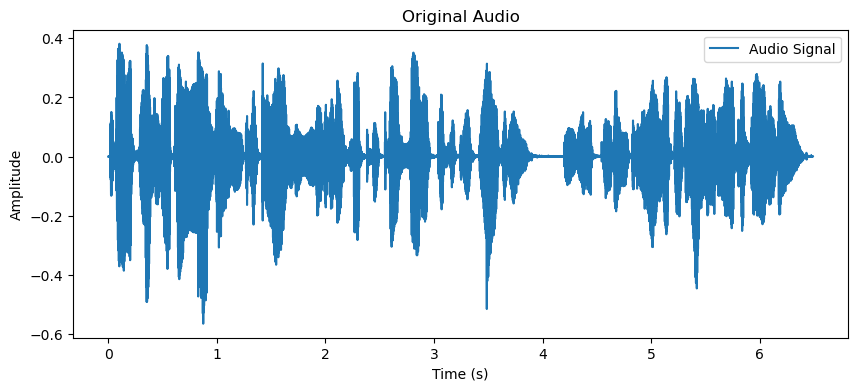

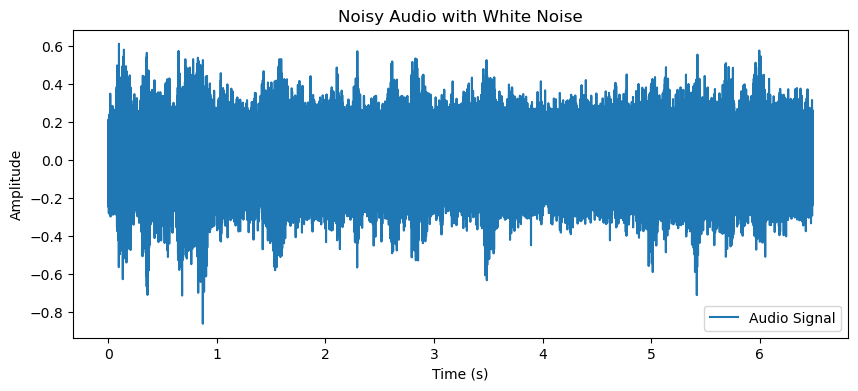

In [23]:
import soundfile as sf
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

def add_white_noise(audio, noise_level):
    # Generate white noise with the same length as the original audio
    noise = np.random.normal(scale=noise_level, size=len(audio))

    # Expand the noise to match the number of channels in the audio
    if audio.ndim == 2 and noise.ndim == 1:
        noise = np.column_stack((noise, noise))

    # Add white noise to the audio signal
    noisy_audio = audio + noise

    return noisy_audio

def play_audio(audio, sample_rate):
    sd.play(audio, samplerate=sample_rate)
    sd.wait()

def save_audio(audio, sample_rate, file_path):
    sf.write(file_path, audio, sample_rate)

def plot_audio_waveform(audio, title, sample_rate):
    duration = len(audio) / sample_rate

    # Create time array for x-axis
    time = np.linspace(0., duration, len(audio), endpoint=False)  # Fix endpoint to avoid IndexError

    plt.figure(figsize=(10, 4))
    
    if audio.ndim == 1:
        # For mono audio
        plt.plot(time, audio, label='Audio Signal')
    elif audio.ndim == 2:
        # For stereo audio
        plt.plot(time, audio[:, 0], label='Channel 1')
        plt.plot(time, audio[:, 1], label='Channel 2')

    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Load the audio file
audio_path = "C:\\Users\\rohit\\Music\\fspeech.wav"
original_audio, sample_rate = sf.read(audio_path)

# Set the noise level (adjust as needed)
noise_level = 0.1  # Adjust the noise level based on your preference

# Add white noise to the audio signal
noisy_audio = add_white_noise(original_audio, noise_level)

# Play the original audio
print("Playing Original Audio...")
play_audio(original_audio, sample_rate)

# Play the noisy audio
print("Playing Noisy Audio with White Noise...")
play_audio(noisy_audio, sample_rate)

# Save the noisy audio to a file
output_path = "C:\\Users\\rohit\\Music\\new.wav"
save_audio(noisy_audio, sample_rate, output_path)
print(f"Noisy audio saved to {output_path}")

# Display the original and noisy audio waveforms
plot_audio_waveform(original_audio, 'Original Audio', sample_rate)
plot_audio_waveform(noisy_audio, 'Noisy Audio with White Noise', sample_rate)


Playing Noisy Audio with White Noise...
Playing Cleaned Audio after Wiener Filter...
Cleaned audio saved to C:\Users\rohit\Music\cleaned_audio_after_wiener.wav


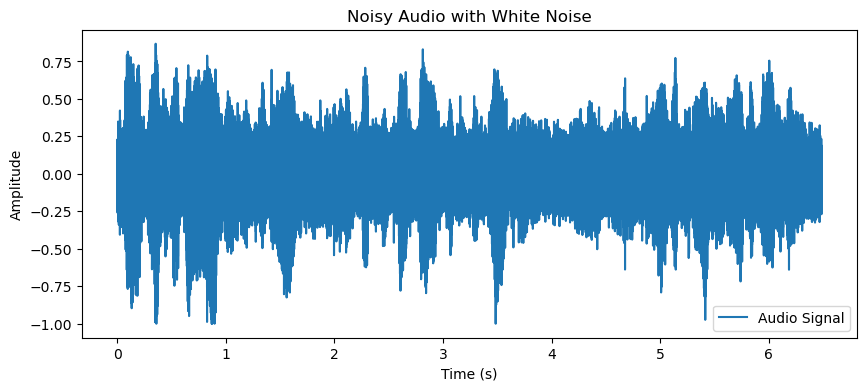

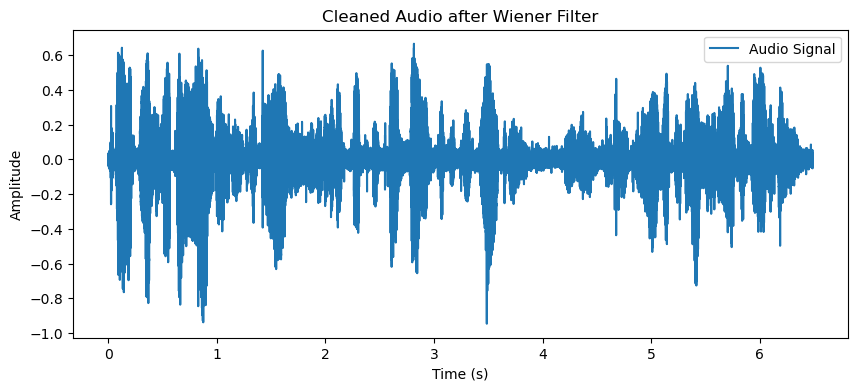

In [2]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener
import sounddevice as sd  

def remove_white_noise(audio, noise_level):
    # Apply Wiener filter to remove white noise
    cleaned_audio = wiener(audio, mysize=20, noise=noise_level**2)

    return cleaned_audio

def play_audio(audio, sample_rate):
    sd.play(audio, samplerate=sample_rate)
    sd.wait()

def save_audio(audio, sample_rate, file_path):
    sf.write(file_path, audio, sample_rate)

def plot_audio_waveform(audio, title, sample_rate):
    duration = len(audio) / sample_rate

    # Create time array for x-axis
    time = np.linspace(0., duration, len(audio), endpoint=False)

    plt.figure(figsize=(10, 4))
    
    if audio.ndim == 1:
        # For mono audio
        plt.plot(time, audio, label='Audio Signal')
    elif audio.ndim == 2:
        # For stereo audio
        plt.plot(time, audio[:, 0], label='Channel 1')
        plt.plot(time, audio[:, 1], label='Channel 2')

    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Load the noisy audio file
noisy_audio_path = "C:\\Users\\rohit\\Downloads\\noisy_audio.wav"
noisy_audio, sample_rate = sf.read(noisy_audio_path)

# Set the noise level (same as used for adding white noise)
noise_level = 0.12

# Apply Wiener filter to remove white noise
cleaned_audio = remove_white_noise(noisy_audio, noise_level)

# Play the original noisy audio
print("Playing Noisy Audio with White Noise...")
play_audio(noisy_audio, sample_rate)

# Play the cleaned audio after applying Wiener filter
print("Playing Cleaned Audio after Wiener Filter...")
play_audio(cleaned_audio, sample_rate)

# Save the cleaned audio to a file
output_path = "C:\\Users\\rohit\\Music\\cleaned_audio_after_wiener.wav"
save_audio(cleaned_audio, sample_rate, output_path)
print(f"Cleaned audio saved to {output_path}")

# Display the original noisy and cleaned audio waveforms
plot_audio_waveform(noisy_audio, 'Noisy Audio with White Noise', sample_rate)
plot_audio_waveform(cleaned_audio, 'Cleaned Audio after Wiener Filter', sample_rate)


Playing Noisy Audio with White Noise...
Playing Cleaned Audio after Bandpass Filter...
Cleaned audio saved to C:\Users\rohit\Downloads\cleaned_audio_after_bandpass.wav


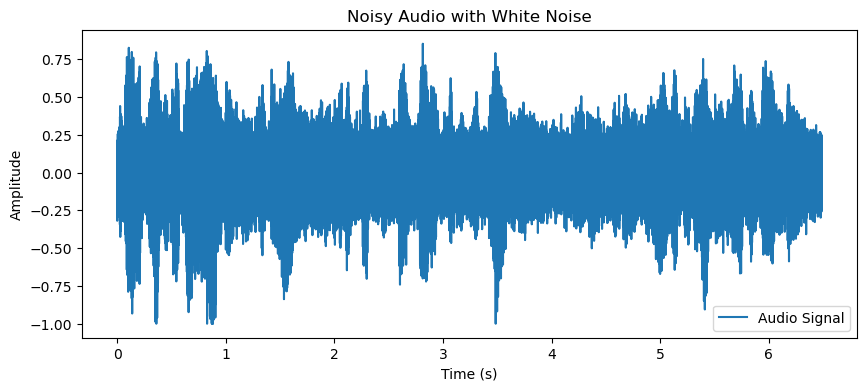

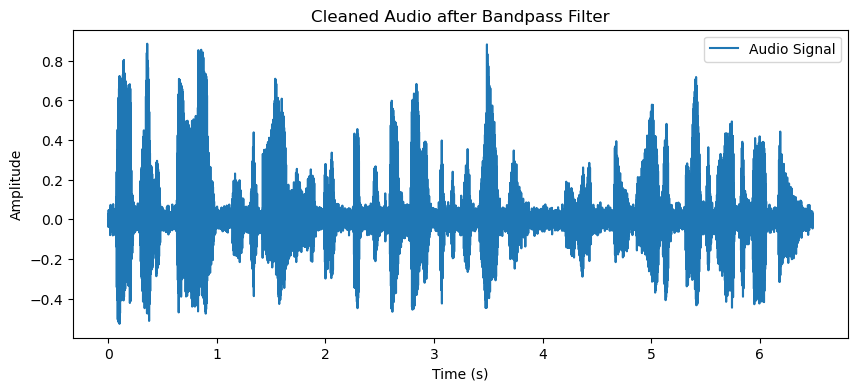

0.3274195803167532


In [2]:
# Import necessary libraries
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  # Import signal module for bandpass filter
import sounddevice as sd

# Define a function to apply a bandpass filter
def apply_bandpass_filter(audio, sample_rate):
    # Define bandpass filter parameters
    low_cutoff = 100  # Adjust as needed
    high_cutoff = 1000  # Adjust as needed
    order = 5

    # Design bandpass filter
    b, a = signal.butter(order, [low_cutoff, high_cutoff], btype='band', fs=sample_rate)

    # Apply the bandpass filter
    filtered_audio = signal.lfilter(b, a, audio)
     # Ensure consistent length
    min_length = min(len(audio), len(filtered_audio))
    audio = audio[:min_length]
    filtered_audio = filtered_audio[:min_length]

    return filtered_audio

# Define a function to play audio
def play_audio(audio, sample_rate):
    sd.play(audio, samplerate=sample_rate)
    sd.wait()

# Define a function to save audio to a file
def save_audio(audio, sample_rate, file_path):
    sf.write(file_path, audio, sample_rate)

# Define a function to plot the audio waveform
def plot_audio_waveform(audio, title, sample_rate):
    duration = len(audio) / sample_rate
    # Create time array for x-axis
    time = np.linspace(0., duration, len(audio), endpoint=False)

    # Plot the audio waveform
    plt.figure(figsize=(10, 4))
    
    if audio.ndim == 1:
        # For mono audio
        plt.plot(time, audio, label='Audio Signal')
    elif audio.ndim == 2:
        # For stereo audio
        plt.plot(time, audio[:, 0], label='Channel 1')
        plt.plot(time, audio[:, 1], label='Channel 2')

    # Set plot attributes
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()


# Function to calculate SNR
def calculate_snr(clean_audio, noisy_audio):
    snr = 10 * np.log10(np.sum(clean_audio**2) / np.sum((clean_audio - noisy_audio)**2))
    return snr

# Load the noisy audio file
noisy_audio_path ="C:\\Users\\rohit\\Downloads\\noisy_audio.wav"
noisy_audio, sample_rate = sf.read(noisy_audio_path)

# Apply bandpass filter to remove unwanted frequencies
cleaned_audio_bandpass= apply_bandpass_filter(noisy_audio, sample_rate)

# Play the original noisy audio
print("Playing Noisy Audio with White Noise...")
play_audio(noisy_audio, sample_rate)

# Play the cleaned audio after applying bandpass filter
print("Playing Cleaned Audio after Bandpass Filter...")
play_audio(cleaned_audio_bandpass, sample_rate)

# Save the cleaned audio to a file
output_path = "C:\\Users\\rohit\\Downloads\\cleaned_audio_after_bandpass.wav"
save_audio(cleaned_audio_bandpass, sample_rate, output_path)
print(f"Cleaned audio saved to {output_path}")

# Display the original noisy and cleaned audio waveforms
plot_audio_waveform(noisy_audio, 'Noisy Audio with White Noise', sample_rate)
plot_audio_waveform(cleaned_audio_bandpass, 'Cleaned Audio after Bandpass Filter', sample_rate)

snr_bandpass_check = calculate_snr(noisy_audio, cleaned_audio_bandpass)
print(snr_bandpass_check)